<a href="https://colab.research.google.com/github/gnkhata/helloworld/blob/main/AI_Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4

This is an basecode for assignment 4 of Artificial Intelligence class (CSCE-4613), Spring 2023


In [1]:
import torch
import torch.nn as nn
import torchvision

import matplotlib.pyplot as plt 
from timeit import default_timer as timer
from datetime import timedelta
from sklearn.metrics import confusion_matrix

## Binary Network

## Define a binary network class


In [2]:
class BinaryNetwork(nn.Module):
  def __init__(self, hidden_dims = [4]):
    super(BinaryNetwork, self).__init__()
    self.network_dims = [2] + hidden_dims + [1]
    self.layers = [] 
    for i, dim in enumerate(self.network_dims[1:]):
      prev_dim = self.network_dims[i]
      dense = nn.Linear(in_features = prev_dim, out_features = dim, bias = True)
      activation = nn.Sigmoid()
      self.layers += [dense, activation]
    self.layers = nn.ModuleList(self.layers)

  def forward(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

### Define data generator

In [ ]:
def generate_data(operator = "AND"):
  assert operator in ["AND", "OR", "XOR", "NOR"], "%s operator is not valid" % operator
  data = []
  label = [] 
  for i in range(2):
    for j in range(2):
      data.append([i, j])
      if operator == "AND":
        label.append(i & j)
      elif operator == "OR":
        label.append(i | j)
      elif operator == "XOR":
        label.append(i ^ j)
      else:
        label.append(not (i | j))
  data = torch.as_tensor(data, dtype = torch.float32)
  label = torch.as_tensor(label, dtype = torch.float32)
  return data, label

### Define the training framework

In [ ]:
model = BinaryNetwork( hidden_dims= [5])
model.train()
print(model)
operator = "XOR" 
inputs, labels = generate_data(operator = operator)
n_iters = 1000
learning_rate = 0.1
bce_loss_fn = nn.BCELoss()
optim = torch.optim.SGD(params = model.parameters(), lr = learning_rate, momentum=0.9)
threshold = 0.5
for i in range(1, n_iters + 1):
  outputs = model(inputs)
  outputs = outputs.reshape(-1)
  
  loss = bce_loss_fn(outputs, labels)
  predictions = (outputs > threshold).long()
  
  accuracy = (predictions == labels).float().mean() * 100.

  optim.zero_grad()
  loss.backward()
  optim.step()

  loss = loss.item() # Convert to Python Scalar
  accuracy = accuracy.item() # Convert to Python Scalar

  if i % 5 == 0:
    print("[%d/%d]. Loss: %0.4f. Accuracy: %0.2f" % (i, n_iters, loss, accuracy))

model.eval()
outputs = model(inputs)
outputs = outputs.reshape(-1)
predictions = (outputs > threshold).long()  
accuracy = (predictions == labels).float().mean() * 100.
accuracy = accuracy.item()
print("Final Accuracy: %0.2f" % (accuracy))

torch.save(model.state_dict(), "%s_Network.pth" % operator)
  # model.load_state_dict(torch.load("%s_Network.pth" % operator)) # Load model in the next time you use

BinaryNetwork(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=5, out_features=1, bias=True)
    (3): Sigmoid()
  )
)
[5/1000]. Loss: 0.6954. Accuracy: 50.00
[10/1000]. Loss: 0.6951. Accuracy: 50.00
[15/1000]. Loss: 0.6952. Accuracy: 50.00
[20/1000]. Loss: 0.6937. Accuracy: 50.00
[25/1000]. Loss: 0.6943. Accuracy: 50.00
[30/1000]. Loss: 0.6936. Accuracy: 50.00
[35/1000]. Loss: 0.6937. Accuracy: 50.00
[40/1000]. Loss: 0.6936. Accuracy: 50.00
[45/1000]. Loss: 0.6935. Accuracy: 75.00
[50/1000]. Loss: 0.6935. Accuracy: 50.00
[55/1000]. Loss: 0.6935. Accuracy: 50.00
[60/1000]. Loss: 0.6935. Accuracy: 50.00
[65/1000]. Loss: 0.6934. Accuracy: 50.00
[70/1000]. Loss: 0.6934. Accuracy: 50.00
[75/1000]. Loss: 0.6934. Accuracy: 50.00
[80/1000]. Loss: 0.6934. Accuracy: 50.00
[85/1000]. Loss: 0.6934. Accuracy: 50.00
[90/1000]. Loss: 0.6933. Accuracy: 50.00
[95/1000]. Loss: 0.6933. Accuracy: 50.00
[100/1000]. Loss: 0.693

**Question 1b**: **AND Operator**

BinaryNetwork(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=6, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=6, out_features=6, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=6, out_features=6, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=6, out_features=1, bias=True)
    (7): Sigmoid()
  )
)
[5/1500]. Loss: 0.5796. Accuracy: 75.00
[10/1500]. Loss: 0.5655. Accuracy: 75.00
[15/1500]. Loss: 0.5755. Accuracy: 75.00
[20/1500]. Loss: 0.5660. Accuracy: 75.00
[25/1500]. Loss: 0.5630. Accuracy: 75.00
[30/1500]. Loss: 0.5652. Accuracy: 75.00
[35/1500]. Loss: 0.5630. Accuracy: 75.00
[40/1500]. Loss: 0.5627. Accuracy: 75.00
[45/1500]. Loss: 0.5630. Accuracy: 75.00
[50/1500]. Loss: 0.5626. Accuracy: 75.00
[55/1500]. Loss: 0.5625. Accuracy: 75.00
[60/1500]. Loss: 0.5625. Accuracy: 75.00
[65/1500]. Loss: 0.5624. Accuracy: 75.00
[70/1500]. Loss: 0.5624. Accuracy: 75.00
[75/1500]. Loss: 0.5624. Accuracy: 75.00
[80/1500]. Loss: 0.5624. Accuracy

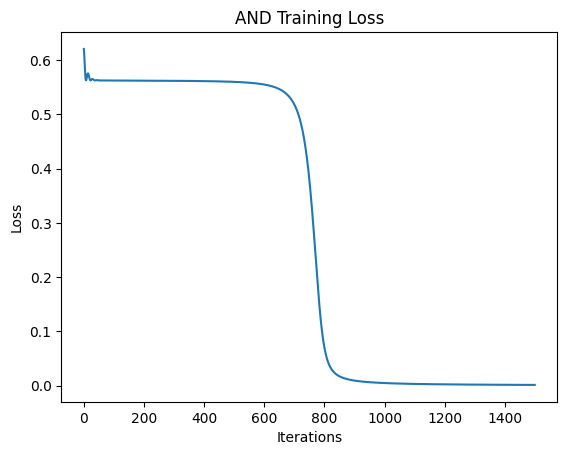

In [ ]:
model = BinaryNetwork( hidden_dims= [6,6,6])
model.train()
print(model)
operator = "AND" 
inputs, labels = generate_data(operator = operator)
n_iters = 1500
learning_rate = 0.1
bce_loss_fn = nn.BCELoss()
optim = torch.optim.SGD(params = model.parameters(), lr = learning_rate, momentum=0.9)
threshold = 0.5
losses = []
for i in range(1, n_iters + 1):
  outputs = model(inputs)
  outputs = outputs.reshape(-1)
  
  loss = bce_loss_fn(outputs, labels)
  losses.append(loss)
  predictions = (outputs > threshold).long()
  
  accuracy = (predictions == labels).float().mean() * 100.

  optim.zero_grad()
  loss.backward()
  optim.step()

  loss = loss.item() # Convert to Python Scalar
  accuracy = accuracy.item() # Convert to Python Scalar

  if i % 5 == 0:
    print("[%d/%d]. Loss: %0.4f. Accuracy: %0.2f" % (i, n_iters, loss, accuracy))

model.eval()
outputs = model(inputs)
outputs = outputs.reshape(-1)
predictions = (outputs > threshold).long()  
accuracy = (predictions == labels).float().mean() * 100.
accuracy = accuracy.item()
#losses = losses.detach().numpy()

with torch.no_grad():
  plt.title(operator+" Training Loss")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.plot(losses)
print("Final Accuracy: %0.2f" % (accuracy))
torch.save(model.state_dict(), "%s_Network.pth" % operator)
  # model.load_state_dict(torch.load("%s_Network.pth" % operator)) # Load model in the next time you use

**Question 1c: OR Operator**

BinaryNetwork(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=4, out_features=4, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=4, out_features=1, bias=True)
    (5): Sigmoid()
  )
)
[5/800]. Loss: 0.5831. Accuracy: 75.00
[10/800]. Loss: 0.5639. Accuracy: 75.00
[15/800]. Loss: 0.5740. Accuracy: 75.00
[20/800]. Loss: 0.5678. Accuracy: 75.00
[25/800]. Loss: 0.5618. Accuracy: 75.00
[30/800]. Loss: 0.5633. Accuracy: 75.00
[35/800]. Loss: 0.5623. Accuracy: 75.00
[40/800]. Loss: 0.5606. Accuracy: 75.00
[45/800]. Loss: 0.5605. Accuracy: 75.00
[50/800]. Loss: 0.5600. Accuracy: 75.00
[55/800]. Loss: 0.5593. Accuracy: 75.00
[60/800]. Loss: 0.5588. Accuracy: 75.00
[65/800]. Loss: 0.5583. Accuracy: 75.00
[70/800]. Loss: 0.5576. Accuracy: 75.00
[75/800]. Loss: 0.5569. Accuracy: 75.00
[80/800]. Loss: 0.5561. Accuracy: 75.00
[85/800]. Loss: 0.5552. Accuracy: 75.00
[90/800]. Loss: 0.5542. Accuracy: 75.00
[95/8

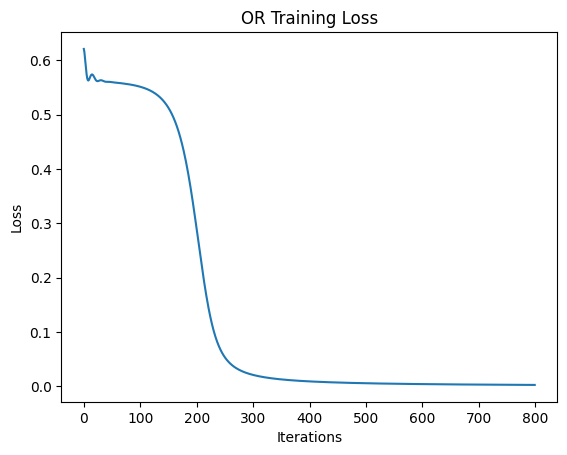

In [ ]:
model = BinaryNetwork( hidden_dims= [4,4])
model.train()
print(model)
operator = "OR" 
inputs, labels = generate_data(operator = operator)
n_iters = 800
learning_rate = 0.1
bce_loss_fn = nn.BCELoss()
optim = torch.optim.SGD(params = model.parameters(), lr = learning_rate, momentum=0.9)
threshold = 0.5
losses = []
for i in range(1, n_iters + 1):
  outputs = model(inputs)
  outputs = outputs.reshape(-1)
  
  loss = bce_loss_fn(outputs, labels)
  losses.append(loss)
  predictions = (outputs > threshold).long()
  
  accuracy = (predictions == labels).float().mean() * 100.

  optim.zero_grad()
  loss.backward()
  optim.step()

  loss = loss.item() # Convert to Python Scalar
  accuracy = accuracy.item() # Convert to Python Scalar

  if i % 5 == 0:
    print("[%d/%d]. Loss: %0.4f. Accuracy: %0.2f" % (i, n_iters, loss, accuracy))

model.eval()
outputs = model(inputs)
outputs = outputs.reshape(-1)
predictions = (outputs > threshold).long()  
accuracy = (predictions == labels).float().mean() * 100.
accuracy = accuracy.item()
#losses = losses.detach().numpy()
with torch.no_grad():
  plt.title(operator+" Training Loss")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.plot(losses)
print("Final Accuracy: %0.2f" % (accuracy))

torch.save(model.state_dict(), "%s_Network.pth" % operator)
  # model.load_state_dict(torch.load("%s_Network.pth" % operator)) # Load model in the next time you use

**Question 1d: XOR Operator**
> Indented block



BinaryNetwork(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=5, out_features=1, bias=True)
    (3): Sigmoid()
  )
)
[5/1500]. Loss: 0.7199. Accuracy: 50.00
[10/1500]. Loss: 0.6965. Accuracy: 50.00
[15/1500]. Loss: 0.7113. Accuracy: 50.00
[20/1500]. Loss: 0.6948. Accuracy: 50.00
[25/1500]. Loss: 0.6945. Accuracy: 50.00
[30/1500]. Loss: 0.6958. Accuracy: 50.00
[35/1500]. Loss: 0.6921. Accuracy: 75.00
[40/1500]. Loss: 0.6927. Accuracy: 50.00
[45/1500]. Loss: 0.6925. Accuracy: 50.00
[50/1500]. Loss: 0.6917. Accuracy: 50.00
[55/1500]. Loss: 0.6918. Accuracy: 75.00
[60/1500]. Loss: 0.6916. Accuracy: 75.00
[65/1500]. Loss: 0.6914. Accuracy: 50.00
[70/1500]. Loss: 0.6913. Accuracy: 25.00
[75/1500]. Loss: 0.6911. Accuracy: 25.00
[80/1500]. Loss: 0.6909. Accuracy: 75.00
[85/1500]. Loss: 0.6907. Accuracy: 75.00
[90/1500]. Loss: 0.6905. Accuracy: 75.00
[95/1500]. Loss: 0.6903. Accuracy: 50.00
[100/1500]. Loss: 0.690

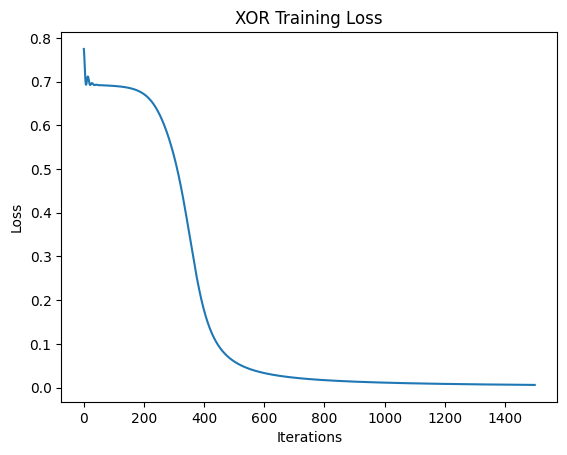

In [ ]:
model = BinaryNetwork( hidden_dims= [5])
model.train()
print(model)
operator = "XOR" 
inputs, labels = generate_data(operator = operator)
n_iters = 1500
learning_rate = 0.1
bce_loss_fn = nn.BCELoss()
optim = torch.optim.SGD(params = model.parameters(), lr = learning_rate, momentum=0.9)
threshold = 0.5
losses = []
for i in range(1, n_iters + 1):
  outputs = model(inputs)
  outputs = outputs.reshape(-1)
  
  loss = bce_loss_fn(outputs, labels)
  losses.append(loss)
  predictions = (outputs > threshold).long()
  
  accuracy = (predictions == labels).float().mean() * 100.

  optim.zero_grad()
  loss.backward()
  optim.step()

  loss = loss.item() # Convert to Python Scalar
  accuracy = accuracy.item() # Convert to Python Scalar

  if i % 5 == 0:
    print("[%d/%d]. Loss: %0.4f. Accuracy: %0.2f" % (i, n_iters, loss, accuracy))

model.eval()
outputs = model(inputs)
outputs = outputs.reshape(-1)
predictions = (outputs > threshold).long()  
accuracy = (predictions == labels).float().mean() * 100.
accuracy = accuracy.item()
#losses = losses.detach().numpy()
with torch.no_grad():
  plt.title(operator+" Training Loss")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.plot(losses)
print("Final Accuracy: %0.2f" % (accuracy))

torch.save(model.state_dict(), "%s_Network.pth" % operator)
  # model.load_state_dict(torch.load("%s_Network.pth" % operator)) # Load model in the next time you use

**Question 1e: NOR Operator**

BinaryNetwork(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=4, out_features=4, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=4, out_features=1, bias=True)
    (5): Sigmoid()
  )
)
[5/800]. Loss: 0.6235. Accuracy: 75.00
[10/800]. Loss: 0.5643. Accuracy: 75.00
[15/800]. Loss: 0.5901. Accuracy: 75.00
[20/800]. Loss: 0.5837. Accuracy: 75.00
[25/800]. Loss: 0.5650. Accuracy: 75.00
[30/800]. Loss: 0.5640. Accuracy: 75.00
[35/800]. Loss: 0.5667. Accuracy: 75.00
[40/800]. Loss: 0.5635. Accuracy: 75.00
[45/800]. Loss: 0.5619. Accuracy: 75.00
[50/800]. Loss: 0.5624. Accuracy: 75.00
[55/800]. Loss: 0.5621. Accuracy: 75.00
[60/800]. Loss: 0.5614. Accuracy: 75.00
[65/800]. Loss: 0.5613. Accuracy: 75.00
[70/800]. Loss: 0.5611. Accuracy: 75.00
[75/800]. Loss: 0.5609. Accuracy: 75.00
[80/800]. Loss: 0.5606. Accuracy: 75.00
[85/800]. Loss: 0.5604. Accuracy: 75.00
[90/800]. Loss: 0.5602. Accuracy: 75.00
[95/8

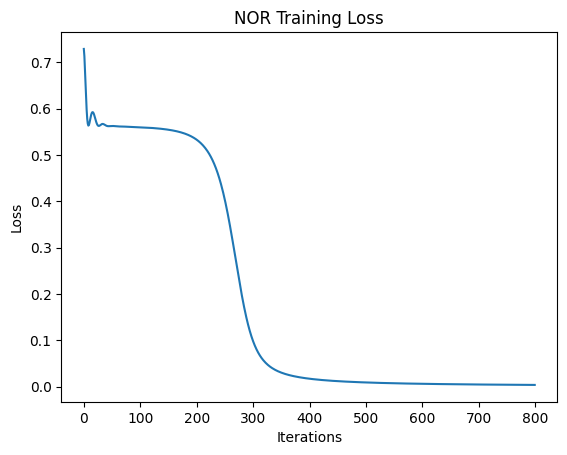

In [ ]:
model = BinaryNetwork( hidden_dims= [4,4])
model.train()
print(model)
operator = "NOR" 
inputs, labels = generate_data(operator = operator)
n_iters = 800
learning_rate = 0.1
bce_loss_fn = nn.BCELoss()
optim = torch.optim.SGD(params = model.parameters(), lr = learning_rate, momentum=0.9)
threshold = 0.5
losses = []
for i in range(1, n_iters + 1):
  outputs = model(inputs)
  outputs = outputs.reshape(-1)
  
  loss = bce_loss_fn(outputs, labels)
  losses.append(loss)
  predictions = (outputs > threshold).long()
  
  accuracy = (predictions == labels).float().mean() * 100.

  optim.zero_grad()
  loss.backward()
  optim.step()

  loss = loss.item() # Convert to Python Scalar
  accuracy = accuracy.item() # Convert to Python Scalar

  if i % 5 == 0:
    print("[%d/%d]. Loss: %0.4f. Accuracy: %0.2f" % (i, n_iters, loss, accuracy))

model.eval()
outputs = model(inputs)
outputs = outputs.reshape(-1)
predictions = (outputs > threshold).long()  
accuracy = (predictions == labels).float().mean() * 100.
accuracy = accuracy.item()
#losses = losses.detach().numpy()
with torch.no_grad():
  plt.title(operator+" Training Loss")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.plot(losses)
print("Final Accuracy: %0.2f" % (accuracy))

torch.save(model.state_dict(), "%s_Network.pth" % operator)
  # model.load_state_dict(torch.load("%s_Network.pth" % operator)) # Load model in the next time you use

## Digit Classification

### Define Digit Classification Network

In [ ]:
class DigitNetwork(nn.Module):
  def __init__(self, hidden_dims = [128]):
    super(DigitNetwork, self).__init__()
    self.network_dims = [28 * 28] + hidden_dims + [10]
    self.layers = [] 
    for i, dim in enumerate(self.network_dims[1:]):
      prev_dim = self.network_dims[i]
      dense = nn.Linear(in_features = prev_dim, out_features = dim, bias = True)
      if i < len(self.network_dims[1:]) - 1:
        activation = nn.Sigmoid() # Hidden Layer 
      else:
        activation = nn.Softmax(dim=1) # Last Layer
      self.layers += [dense, activation]
    self.layers = nn.ModuleList(self.layers)

  def forward(self, x):
    size = x.size()
    x = x.reshape(size[0], -1) # Flatten images
    for layer in self.layers[:-1]:
      x = layer(x)
    if self.training == False:
      x = self.layers[-1](x) 
    return x

### Define Data Generator

In [6]:
def create_data_generator(batch_size = 64, root = "data"):
  train_dataset = torchvision.datasets.MNIST(root = root,
                                             train = True,
                                             transform = torchvision.transforms.ToTensor(),
                                             download = True)
  test_dataset = torchvision.datasets.MNIST(root = root,
                                             train = False,
                                             transform = torchvision.transforms.ToTensor(),
                                             download = True)
  train_loader = torch.utils.data.DataLoader(train_dataset,
                                             batch_size = batch_size,
                                             shuffle = True)
  test_loader = torch.utils.data.DataLoader(test_dataset,
                                             batch_size = batch_size,
                                             shuffle = False)
  return train_loader, test_loader

### Define the training framework

In [ ]:
cuda = torch.cuda.is_available()
batch_size = 32
train_loader, test_loader = create_data_generator(batch_size)
model = DigitNetwork(hidden_dims=[])
print(model)
if cuda:
  model.cuda()
n_epochs = 1
learning_rate = 0.1
optim = torch.optim.SGD(params = model.parameters(), lr = learning_rate, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

model.train() 
for epoch in range(1, n_epochs + 1):
  for idx, (images, labels) in enumerate(train_loader):
    if cuda:
      images = images.cuda()
      labels = labels.cuda()
      
    outputs = model(images)

    loss = loss_fn(outputs, labels) 

    optim.zero_grad()
    loss.backward()
    optim.step() 

    predictions = torch.argmax(outputs, 1)
    accuracy = (predictions == labels).float().mean() * 100.

    loss = loss.item() # Convert to Python Scalar
    accuracy = accuracy.item() # Convert to Python Scalar

    if idx % 100 == 0:
      print("Epoch [%d/%d]. Iter [%d/%d]. Loss: %0.2f. Accuracy: %0.2f" % (epoch, n_epochs, idx + 1, len(train_loader), loss, accuracy))

torch.save(model.state_dict(), "MNIST_Network.pth")

DigitNetwork(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=10, bias=True)
    (1): Softmax(dim=1)
  )
)
Epoch [1/1]. Iter [1/1875]. Loss: 2.32. Accuracy: 6.25
Epoch [1/1]. Iter [101/1875]. Loss: 0.17. Accuracy: 93.75
Epoch [1/1]. Iter [201/1875]. Loss: 0.47. Accuracy: 87.50
Epoch [1/1]. Iter [301/1875]. Loss: 1.35. Accuracy: 84.38
Epoch [1/1]. Iter [401/1875]. Loss: 0.34. Accuracy: 93.75
Epoch [1/1]. Iter [501/1875]. Loss: 0.23. Accuracy: 93.75
Epoch [1/1]. Iter [601/1875]. Loss: 0.57. Accuracy: 93.75
Epoch [1/1]. Iter [701/1875]. Loss: 0.28. Accuracy: 93.75
Epoch [1/1]. Iter [801/1875]. Loss: 0.40. Accuracy: 90.62
Epoch [1/1]. Iter [901/1875]. Loss: 0.09. Accuracy: 96.88
Epoch [1/1]. Iter [1001/1875]. Loss: 0.57. Accuracy: 84.38
Epoch [1/1]. Iter [1101/1875]. Loss: 1.15. Accuracy: 68.75
Epoch [1/1]. Iter [1201/1875]. Loss: 0.72. Accuracy: 81.25
Epoch [1/1]. Iter [1301/1875]. Loss: 0.60. Accuracy: 87.50
Epoch [1/1]. Iter [1401/1875]. Loss: 0.55. Accuracy: 87.50

**Question 2a**

**Question 2b**

DigitNetwork(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=8, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=8, out_features=10, bias=True)
    (3): Softmax(dim=1)
  )
)

 Model parameters:  6370
Epoch [1/10]. Iter [1/938]. Loss: 2.41. Accuracy: 9.38
Epoch [1/10]. Iter [101/938]. Loss: 0.87. Accuracy: 81.25
Epoch [1/10]. Iter [201/938]. Loss: 0.82. Accuracy: 78.12
Epoch [1/10]. Iter [301/938]. Loss: 0.55. Accuracy: 85.94
Epoch [1/10]. Iter [401/938]. Loss: 0.60. Accuracy: 87.50
Epoch [1/10]. Iter [501/938]. Loss: 0.49. Accuracy: 85.94
Epoch [1/10]. Iter [601/938]. Loss: 0.31. Accuracy: 89.06
Epoch [1/10]. Iter [701/938]. Loss: 0.53. Accuracy: 85.94
Epoch [1/10]. Iter [801/938]. Loss: 0.43. Accuracy: 85.94
Epoch [1/10]. Iter [901/938]. Loss: 0.23. Accuracy: 95.31
Epoch [2/10]. Iter [1/938]. Loss: 0.43. Accuracy: 93.75
Epoch [2/10]. Iter [101/938]. Loss: 0.30. Accuracy: 90.62
Epoch [2/10]. Iter [201/938]. Loss: 0.36. Accuracy: 90.62
Epoch [2/10]. Iter 

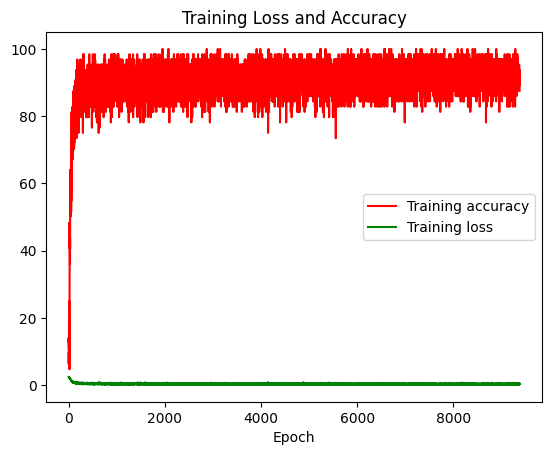

In [ ]:
cuda = torch.cuda.is_available()
batch_size = 64
train_loader, test_loader = create_data_generator(batch_size)
model = DigitNetwork(hidden_dims=[8])
print(model)
total_params = sum(
	param.numel() for param in model.parameters()
)

print("\n Model parameters: ", total_params)
if cuda:
  model.cuda()
n_epochs = 10
learning_rate = 0.1
optim = torch.optim.SGD(params = model.parameters(), lr = learning_rate, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

model.train()
Losses = []
Acc_ies = []
iter_time = 0
for epoch in range(1, n_epochs + 1):
  train_start = timer()
  for idx, (images, labels) in enumerate(train_loader):
    start_iter = timer()
    if cuda:
      images = images.cuda()
      labels = labels.cuda()
      
    outputs = model(images)

    loss = loss_fn(outputs, labels) 

    optim.zero_grad()
    loss.backward()
    optim.step() 

    predictions = torch.argmax(outputs, 1)
    accuracy = (predictions == labels).float().mean() * 100.

    loss = loss.item() # Convert to Python Scalar
    Losses.append(loss)
    accuracy = accuracy.item() # Convert to Python Scalar
    Acc_ies.append(accuracy)

    if idx % 100 == 0:
      print("Epoch [%d/%d]. Iter [%d/%d]. Loss: %0.2f. Accuracy: %0.2f" % (epoch, n_epochs, idx + 1, len(train_loader), loss, accuracy))
    end_iter = timer()
    iter_time += (end_iter-start_iter)
train_end = timer()
print("Iteration average time: ", timedelta(seconds = iter_time/len(train_loader)))
print("Training time: ", timedelta(seconds = train_end-train_start))
#print("Train_loader length: ", len(train_loader))

torch.save(model.state_dict(), "MNIST_Network.pth")

train_final_acc = accuracy
print("Final Accuracy: %0.2f" % (train_final_acc))

plt.plot(Acc_ies, color='r', label='Training accuracy')
plt.plot(Losses, color='g', label='Training loss')
plt.xlabel("Epoch")
plt.title("Training Loss and Accuracy")
plt.legend()
plt.show()

**Question 2c**

In [ ]:
#Final accuracy
print("Final train Accuracy: %0.2f" % (train_final_acc))

cuda = torch.cuda.is_available() 
batch_size = 64 
train_loader, test_loader = create_data_generator(batch_size) 
#model = DigitNetwork()
model = DigitNetwork(hidden_dims=[8])

if cuda:
   model.cuda() 

model.eval() 
model.load_state_dict(torch.load("MNIST_Network.pth")) 
total_accuracy = 0.0 
for idx, (images, labels) in enumerate(test_loader): 
  start = timer()
  if cuda: 
    images = images.cuda() 
    labels = labels.cuda() 
  outputs = model(images) 
  predictions = torch.argmax(outputs, 1) 
  accuracy = (predictions == labels).float().mean() * 100. 
  accuracy = accuracy.item() # Convert to Python Scalar 
  total_accuracy += accuracy 
  if idx % 2000 == 0: 
    print("Iter [%d/%d]. Accuracy: %0.2f" % (idx + 1, len(test_loader), accuracy)) 
    print("Final Accuracy: %0.2f" % (total_accuracy / len(test_loader)))
  end = timer()
print("Testing time for one batch: ", timedelta(seconds = end-start))
print("\nConfusion matrix for last batch:\n", confusion_matrix(labels.cpu(), predictions.cpu()))

Final train Accuracy: 87.50
Iter [1/157]. Accuracy: 95.31
Final Accuracy: 0.61
Testing time for one batch:  0:00:00.000394

Confusion matrix for last batch:
 [[1 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]


**Question 2d: visualizing correctly predicted samples** 

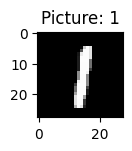

Original label:  1
Predicted label:  1
Confidence level is: 99.49%



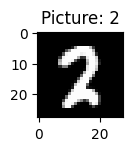

Original label:  2
Predicted label:  2
Confidence level is: 48.01%



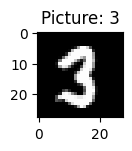

Original label:  3
Predicted label:  3
Confidence level is: 84.05%



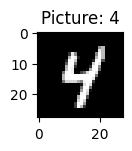

Original label:  4
Predicted label:  4
Confidence level is: 98.35%



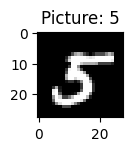

Original label:  5
Predicted label:  5
Confidence level is: 95.54%



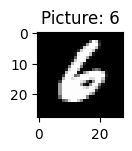

Original label:  6
Predicted label:  6
Confidence level is: 99.90%



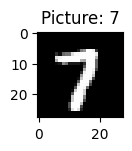

Original label:  7
Predicted label:  7
Confidence level is: 99.86%



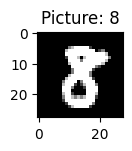

Original label:  8
Predicted label:  8
Confidence level is: 55.61%



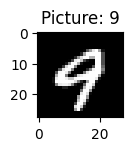

Original label:  9
Predicted label:  9
Confidence level is: 85.19%



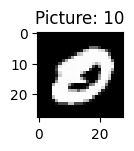

Original label:  0
Predicted label:  0
Confidence level is: 96.74%



In [ ]:
check_corr = 0
for idx, prediction in enumerate (predictions):
  if predictions[idx] == labels[idx]:
    plt.subplot(2,5, idx+1 )
    plt.title("Picture: %d" %(idx+1))
    plt.imshow(images[idx].reshape(28,28), cmap=pyplot.get_cmap('gray'))
    plt.show()
    prob = outputs[idx, predictions[idx]].item() * 100
    print("Original label: ", labels[idx].item())
    print("Predicted label: ", predictions[idx].item())
    print("Confidence level is: %.2f%%" %(prob))
    print()
    check_corr +=1 
    if check_corr == 10:
      break

**Question 2d: visualizing incorrectly predicted samples**

In [ ]:
check_incorr = 0
for idx, prediction in enumerate (predictions):
  if predictions[idx] != labels[idx]:
    prob = outputs[idx, predictions[idx]].item() * 100
    plt.subplot(2,5, idx+1 )
    plt.title("Picture: %d" %(idx+1))
    plt.imshow(images[idx].reshape(28,28), cmap=pyplot.get_cmap('gray'))
    plt.show()
    print("Original label: ", labels[idx].item())
    print("Predicted label: ", predictions[idx].item())
    print("Confidence level is: %.2f%%" %(prob))
    print()
    check_corr +=1 
    if check_incorr == 10:
      break
if check_incorr == 0:
  print("No incorrect predictions!")

No incorrect predictions!


In [ ]:
outputs.shape

torch.Size([16, 10])

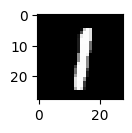

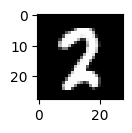

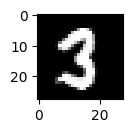

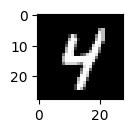

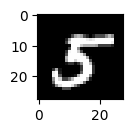

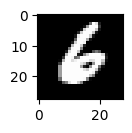

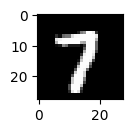

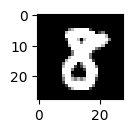

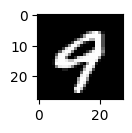

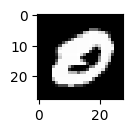

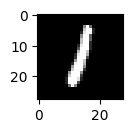

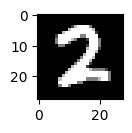

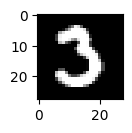

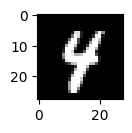

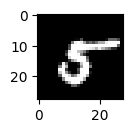

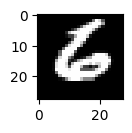

In [ ]:
for idx, prediction in enumerate (predictions):
  #plt.imshow(images[idx].reshape(28,28))
  #print("idx: ", idx)
  if predictions[idx] == labels[idx]:
    #plt.imshow(images[idx].reshape(28,28))
    pyplot.subplot(2,5, i+1)
    pyplot.imshow(images[idx].reshape(28,28), cmap=pyplot.get_cmap('gray'))
    pyplot.show()

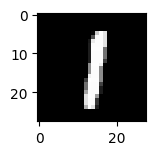

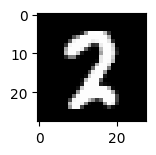

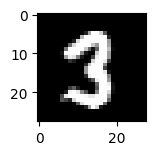

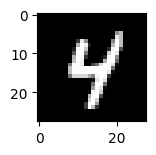

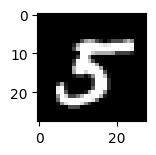

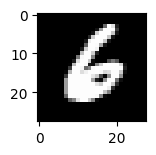

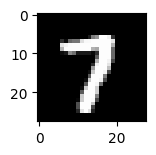

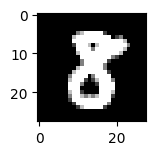

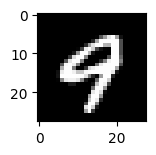

In [ ]:
from matplotlib import pyplot
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(images[i].reshape(28,28), cmap=pyplot.get_cmap('gray'))
  pyplot.show()

### Define the evaluation framework

In [ ]:
cuda = torch.cuda.is_available()
batch_size = 1
train_loader, test_loader = create_data_generator(batch_size)
model = DigitNetwork(hidden_dims=[])
if cuda:
  model.cuda()
model.eval()
model.load_state_dict(torch.load("MNIST_Network.pth"))

total_accuracy = 0.0 
for idx, (images, labels) in enumerate(test_loader):
  if cuda:
    images = images.cuda()
    labels = labels.cuda()
    
  outputs = model(images)

  predictions = torch.argmax(outputs, 1)
  accuracy = (predictions == labels).float().mean() * 100.

  accuracy = accuracy.item() # Convert to Python Scalar

  total_accuracy += accuracy

  if idx % 2000 == 0:
    print("Iter [%d/%d]. Accuracy: %0.2f" % (idx + 1, len(test_loader), accuracy))

print("Final Accuracy: %0.2f" % (total_accuracy / len(test_loader)))

Iter [1/10000]. Accuracy: 100.00
Iter [2001/10000]. Accuracy: 100.00
Iter [4001/10000]. Accuracy: 0.00
Iter [6001/10000]. Accuracy: 100.00
Iter [8001/10000]. Accuracy: 100.00
Final Accuracy: 90.94


## Backpropagation

### ReLU Example

In [ ]:
# https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#pytorch-defining-new-autograd-functions
class MyReLU(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        ctx.save_for_backward(input)
        return input.clamp(min=0)

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, = ctx.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input

#### Sigmoid Function


In [ ]:
class MySigmoid(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input):
        # input is a N x C tensor, N is the batch size, C is the dimension of input
        ctx.save_for_backward(input)
        # YOUR CODE HERE
        sigmoid_act =  1 / (1 + torch.exp(-input))
        return sigmoid_act
        # return output of sigmoid function
        
    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        # YOUR CODE HERE
        sigmoid_act =  1 / (1 + torch.exp(-input))
        grad_input = grad_output*sigmoid_act * (1 - sigmoid_act) 
        return grad_input
        # YOUR CODE HERE
        # return grad_input

**Question 3a**

In [2]:
class MySigmoid(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input):
        # input is a N x C tensor, N is the batch size, C is the dimension of input
        ctx.save_for_backward(input)
        # YOUR CODE HERE
        sigmoid_act =  1 / (1 + torch.exp(-input))
        return sigmoid_act
        # return output of sigmoid function
        
    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        # YOUR CODE HERE
        sigmoid_act =  1 / (1 + torch.exp(-input))
        grad_input = grad_output*sigmoid_act * (1 - sigmoid_act) 
        return grad_input
        # YOUR CODE HERE
        # return grad_input

#### Fully Connected Layer

In [5]:
class MyLinearFunction(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input, weights, bias):
        # input is a N x C tensor, N is the batch size, C is the dimension of input
        # weights is a C x D tensor, C and D are the dimension out input and ouput
        # bias is D tensor
        ctx.save_for_backward(input, weights, bias)
        """
        # YOUR CODE HERE
        output = input.mm(weights.t())
        if bias is not None:
            output += bias.unsqueeze(0).expand_as(output)
        return output
        # YOUR CODE HERE
        #x = torch.dot(input, weights)+bias
        #return x
        """
        # return output of linear function
        return torch.matmul(input, weights) + bias
        
    @staticmethod
    def backward(ctx, grad_output):
        input, weights, bias = ctx.saved_tensors
        # YOUR CODE HERE
        """
        if ctx.needs_input_grad[0]:
            grad_input = grad_output.mm(weights)
        if ctx.needs_input_grad[1]:
            grad_weights = grad_output.t().mm(input)
        if bias is not None and ctx.needs_input_grad[2]:
            grad_bias = grad_output.sum(0)
        """
        
        return grad_input, grad_weights, grad_bias
        # YOUR CODE HERE
        # return grad_input, grad_weights, grad_bias

class MyLinearLayer(nn.Module):
  # You don't modify this layer
  def __init__(self, in_features = 2, out_features = 4):
    super(MyLinearLayer, self).__init__()
    self.weights = nn.Parameter(torch.randn(in_features, out_features))
    self.bias = nn.Parameter(torch.zeros(out_features))
    self.linear_fn = MyLinearFunction.apply

  def forward(self, input):
    return self.linear_fn(input, self.weights, self.bias)


**Question 3b**

In [19]:
class MyLinearFunction(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input, weights, bias):
        # input is a N x C tensor, N is the batch size, C is the dimension of input
        # weights is a C x D tensor, C and D are the dimension out input and ouput
        # bias is D tensor
        ctx.save_for_backward(input, weights, bias)
        """
        # YOUR CODE HERE
        output = input.mm(weights.t())
        if bias is not None:
            output += bias.unsqueeze(0).expand_as(output)
        return output
        # YOUR CODE HERE
        #x = torch.dot(input, weights)+bias
        #return x
        """
        # return output of linear function
        return torch.matmul(input, weights) + bias
        
    @staticmethod
    def backward(ctx, grad_output):
        input, weights, bias = ctx.saved_tensors
        # YOUR CODE HERE
        grad_input = grad_output.mm(weights.t())
        grad_weights = grad_output.t().mm(input)
        grad_bias = grad_output.sum(0)
        
        return grad_input, grad_weights.t(), grad_bias
        # YOUR CODE HERE
        # return grad_input, grad_weights, grad_bias

class MyLinearLayer(nn.Module):
  # You don't modify this layer
  def __init__(self, in_features = 2, out_features = 4):
    super(MyLinearLayer, self).__init__()
    self.weights = nn.Parameter(torch.randn(in_features, out_features))
    self.bias = nn.Parameter(torch.zeros(out_features))
    self.linear_fn = MyLinearFunction.apply

  def forward(self, input):
    return self.linear_fn(input, self.weights, self.bias)


#### Testing Your Implementation

In [20]:
class MyLinearNetwork(nn.Module):
  def __init__(self):
    super(MyLinearNetwork, self).__init__()
    self.linear_1 = MyLinearLayer(28 * 28, 128)
    self.sigmoid_fn = MySigmoid.apply
    self.linear_2 = MyLinearLayer(128, 10)
    self.softmax_fn = nn.Softmax(dim=1)

  def forward(self, x):
    size = x.size()
    x = x.reshape(size[0], -1) # Flatten images
    x = self.linear_1(x)
    x = self.sigmoid_fn(x)
    x = self.linear_2(x)
    if self.training == False:
      x = self.softmax_fn(x)
    return x 

In [22]:
cuda = torch.cuda.is_available()
batch_size = 32
train_loader, test_loader = create_data_generator(batch_size)
model = MyLinearNetwork()
print(model)
if cuda:
  model.cuda()
n_epochs = 3
learning_rate = 0.1
optim = torch.optim.SGD(params = model.parameters(), lr = learning_rate, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

model.train() 
for epoch in range(1, n_epochs + 1):
  for idx, (images, labels) in enumerate(train_loader):
    if cuda:
      images = images.cuda()
      labels = labels.cuda()
      
    outputs = model(images)

    loss = loss_fn(outputs, labels) 

    optim.zero_grad()
    loss.backward()
    optim.step() 

    predictions = torch.argmax(outputs, 1)
    accuracy = (predictions == labels).float().mean() * 100.

    loss = loss.item() # Convert to Python Scalar
    accuracy = accuracy.item() # Convert to Python Scalar

    if idx % 100 == 0:
      print("Epoch [%d/%d]. Iter [%d/%d]. Loss: %0.2f. Accuracy: %0.2f" % (epoch, n_epochs, idx + 1, len(train_loader), loss, accuracy))

total_accuracy = 0.0 
model.eval()
for idx, (images, labels) in enumerate(test_loader):
  if cuda:
    images = images.cuda()
    labels = labels.cuda()
    
  outputs = model(images)

  predictions = torch.argmax(outputs, 1)
  accuracy = (predictions == labels).float().mean() * 100.

  accuracy = accuracy.item() # Convert to Python Scalar

  total_accuracy += accuracy

  if idx % 2000 == 0:
    print("Iter [%d/%d]. Accuracy: %0.2f" % (idx + 1, len(test_loader), accuracy))

print("Final Accuracy: %0.2f" % (total_accuracy / len(test_loader)))

MyLinearNetwork(
  (linear_1): MyLinearLayer()
  (linear_2): MyLinearLayer()
  (softmax_fn): Softmax(dim=1)
)
Epoch [1/3]. Iter [1/1875]. Loss: 10.19. Accuracy: 12.50
Epoch [1/3]. Iter [101/1875]. Loss: 1.07. Accuracy: 81.25
Epoch [1/3]. Iter [201/1875]. Loss: 0.64. Accuracy: 81.25
Epoch [1/3]. Iter [301/1875]. Loss: 0.94. Accuracy: 78.12
Epoch [1/3]. Iter [401/1875]. Loss: 0.78. Accuracy: 87.50
Epoch [1/3]. Iter [501/1875]. Loss: 0.49. Accuracy: 87.50
Epoch [1/3]. Iter [601/1875]. Loss: 1.10. Accuracy: 81.25
Epoch [1/3]. Iter [701/1875]. Loss: 0.10. Accuracy: 93.75
Epoch [1/3]. Iter [801/1875]. Loss: 0.20. Accuracy: 90.62
Epoch [1/3]. Iter [901/1875]. Loss: 0.36. Accuracy: 90.62
Epoch [1/3]. Iter [1001/1875]. Loss: 0.18. Accuracy: 93.75
Epoch [1/3]. Iter [1101/1875]. Loss: 0.20. Accuracy: 90.62
Epoch [1/3]. Iter [1201/1875]. Loss: 0.26. Accuracy: 87.50
Epoch [1/3]. Iter [1301/1875]. Loss: 0.13. Accuracy: 96.88
Epoch [1/3]. Iter [1401/1875]. Loss: 0.15. Accuracy: 96.88
Epoch [1/3]. Ite